## Random Forest

## 1. Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset.

Check for missing values, outliers, inconsistencies in the data.


In [4]:
import pandas as pd

In [5]:
data=pd.read_csv('glass.csv')
df=pd.DataFrame(data)

In [6]:
df

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   1.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   1.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   1.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   1.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   1.0
..       ...    ...   ...   ...    ...   ...   ...  ...  ...   ...
994      NaN    NaN   NaN   NaN    NaN   NaN   NaN  NaN  NaN   NaN
995      NaN    NaN   NaN   NaN    NaN   NaN   NaN  NaN  NaN   NaN
996      NaN    NaN   NaN   NaN    NaN   NaN   NaN  NaN  NaN   NaN
997      NaN    NaN   NaN   NaN    NaN   NaN   NaN  NaN  NaN   NaN
998      NaN    NaN   NaN   NaN    NaN   NaN   NaN  NaN  NaN   NaN

[999 rows x 10 columns]

In [7]:
df.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   1.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   1.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   1.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   1.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   1.0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 78.2 KB


In [9]:
df.describe()

RI          Na          Mg  ...          Ba          Fe        Type
count  214.000000  214.000000  214.000000  ...  214.000000  214.000000  214.000000
mean     1.518365   13.407850    2.684533  ...    0.175047    0.057009    2.780374
std      0.003037    0.816604    1.442408  ...    0.497219    0.097439    2.103739
min      1.511150   10.730000    0.000000  ...    0.000000    0.000000    1.000000
25%      1.516522   12.907500    2.115000  ...    0.000000    0.000000    1.000000
50%      1.517680   13.300000    3.480000  ...    0.000000    0.000000    2.000000
75%      1.519157   13.825000    3.600000  ...    0.000000    0.100000    3.000000
max      1.533930   17.380000    4.490000  ...    3.150000    0.510000    7.000000

[8 rows x 10 columns]

In [10]:
df.isna().sum()

RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64

In [11]:
for col in df.columns:
     
     Q1=df[col].quantile(.25)
     Q3=df[col].quantile(.75)
     IQR=Q3-Q1
     
     upper=Q3+(1.5*IQR)
     lower=Q1-(1.5*IQR)
     outlier=df[(df[col]>upper)|(df[col]<lower)]
     
     print('\n\n',col)
     print('Upper: ',upper)
     print('Lower: ',lower)
     print('Outliers: ',len(outlier))    



 RI
Upper:  1.52311
Lower:  1.5125700000000002
Outliers:  17


 Na
Upper:  15.201249999999998
Lower:  11.531250000000004
Outliers:  7


 Mg
Upper:  5.827500000000001
Lower:  -0.11250000000000071
Outliers:  0


 Al
Upper:  2.29
Lower:  0.53
Outliers:  18


 Si
Upper:  74.29875000000001
Lower:  71.06875
Outliers:  12


 K
Upper:  1.34125
Lower:  -0.6087499999999999
Outliers:  7


 Ca
Upper:  10.57125
Lower:  6.841250000000001
Outliers:  26


 Ba
Upper:  0.0
Lower:  0.0
Outliers:  38


 Fe
Upper:  0.25
Lower:  -0.15000000000000002
Outliers:  12


 Type
Upper:  6.0
Lower:  -2.0
Outliers:  29


In [12]:
def outlier(df,col):
    
     Q1=df[col].quantile(.25)
     Q3=df[col].quantile(.75)
     IQR=Q3-Q1
     
     upper=Q3+(1.5*IQR)
     lower=Q1-(1.5*IQR)
     
     return upper,lower
 
def replace(df):
     
     df_clean=df.copy()
     
     for col in df.columns:
          
          upper,lower=outlier(df,col)
          df_clean[col]=df_clean[col].astype(float)
          df_clean.loc[df_clean[col]>upper,col]=upper
          df_clean.loc[df_clean[col]<lower,col]=lower
      
     return df_clean   

In [13]:
df_clean=replace(df)

for col in df.columns:
     
     Q1=df_clean[col].quantile(.25)
     Q3=df_clean[col].quantile(.75)
     IQR=Q3-Q1
     
     upper=Q3+(1.5*IQR)
     lower=Q1-(1.5*IQR)
     outlier=df_clean[(df_clean[col]>upper)|(df_clean[col]<lower)]
     
     print('\n',col)
     print('Outliers: ',len(outlier))  


 RI
Outliers:  0

 Na
Outliers:  0

 Mg
Outliers:  0

 Al
Outliers:  0

 Si
Outliers:  0

 K
Outliers:  0

 Ca
Outliers:  0

 Ba
Outliers:  0

 Fe
Outliers:  0

 Type
Outliers:  0


In [14]:
df_clean

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   1.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   1.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   1.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   1.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   1.0
..       ...    ...   ...   ...    ...   ...   ...  ...  ...   ...
994      NaN    NaN   NaN   NaN    NaN   NaN   NaN  NaN  NaN   NaN
995      NaN    NaN   NaN   NaN    NaN   NaN   NaN  NaN  NaN   NaN
996      NaN    NaN   NaN   NaN    NaN   NaN   NaN  NaN  NaN   NaN
997      NaN    NaN   NaN   NaN    NaN   NaN   NaN  NaN  NaN   NaN
998      NaN    NaN   NaN   NaN    NaN   NaN   NaN  NaN  NaN   NaN

[999 rows x 10 columns]

In [15]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
994     True
995     True
996     True
997     True
998     True
Length: 999, dtype: bool

In [16]:
df1=df.drop_duplicates()

In [17]:
df1

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0   1.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0   1.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0   1.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0   1.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0   1.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0   7.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0   7.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0   7.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0   7.0
214      NaN    NaN   NaN   NaN    NaN   NaN   NaN   NaN  NaN   NaN

[214 rows x 10 columns]

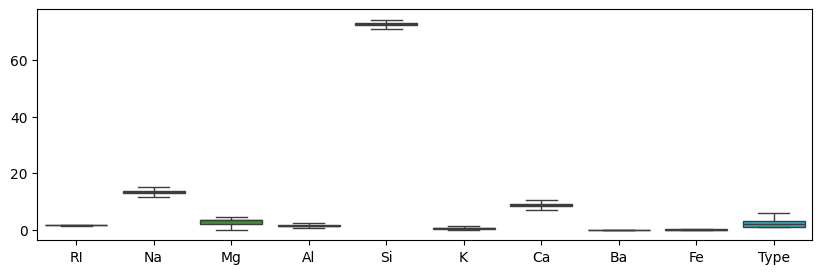

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
sns.boxplot(df_clean)
plt.show()

## 2: Data Visualization:

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

Analyze any patterns or correlations observed in the data.


array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>],
       [<Axes: title={'center': 'Type'}>, <Axes: >, <Axes: >]],
      dtype=object)

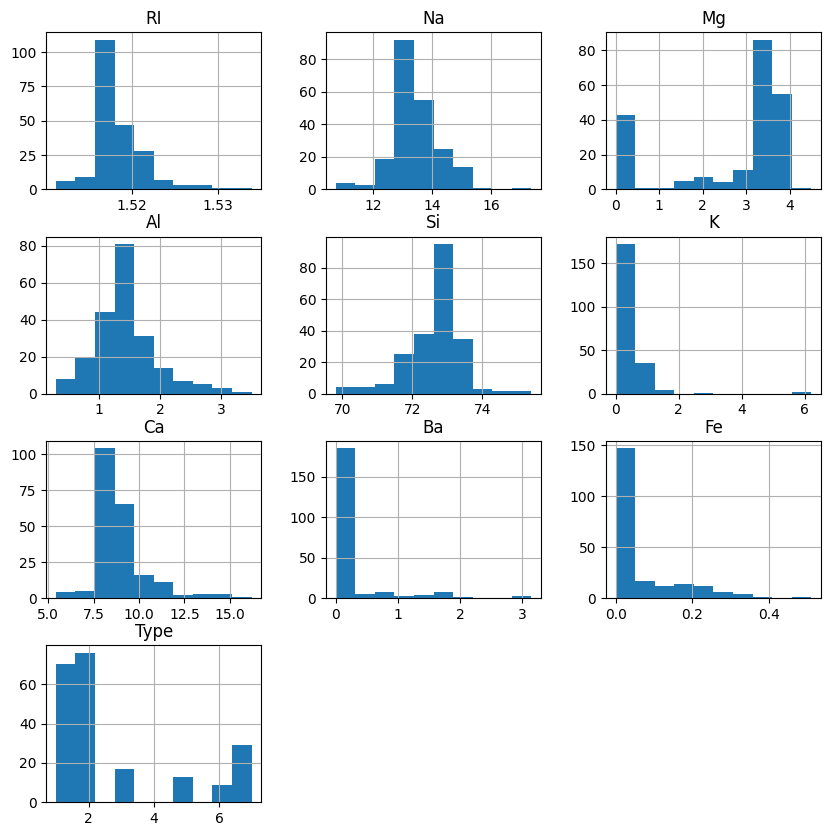

In [19]:
df.hist(figsize=(10,10))

<Axes: >

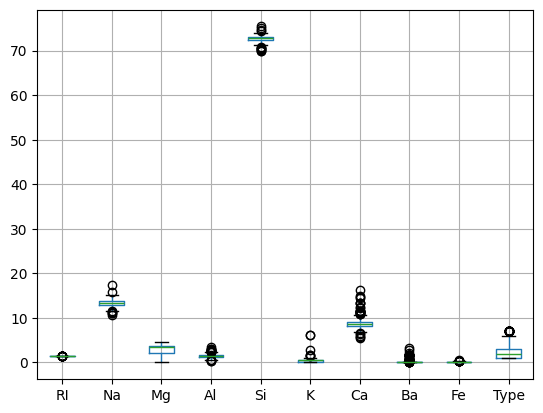

In [20]:
df.boxplot() #It has outliers

<Axes: >

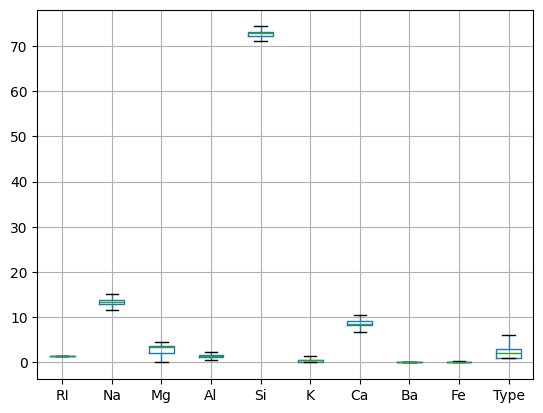

In [21]:
df_clean.boxplot() #It doesn't have outliers

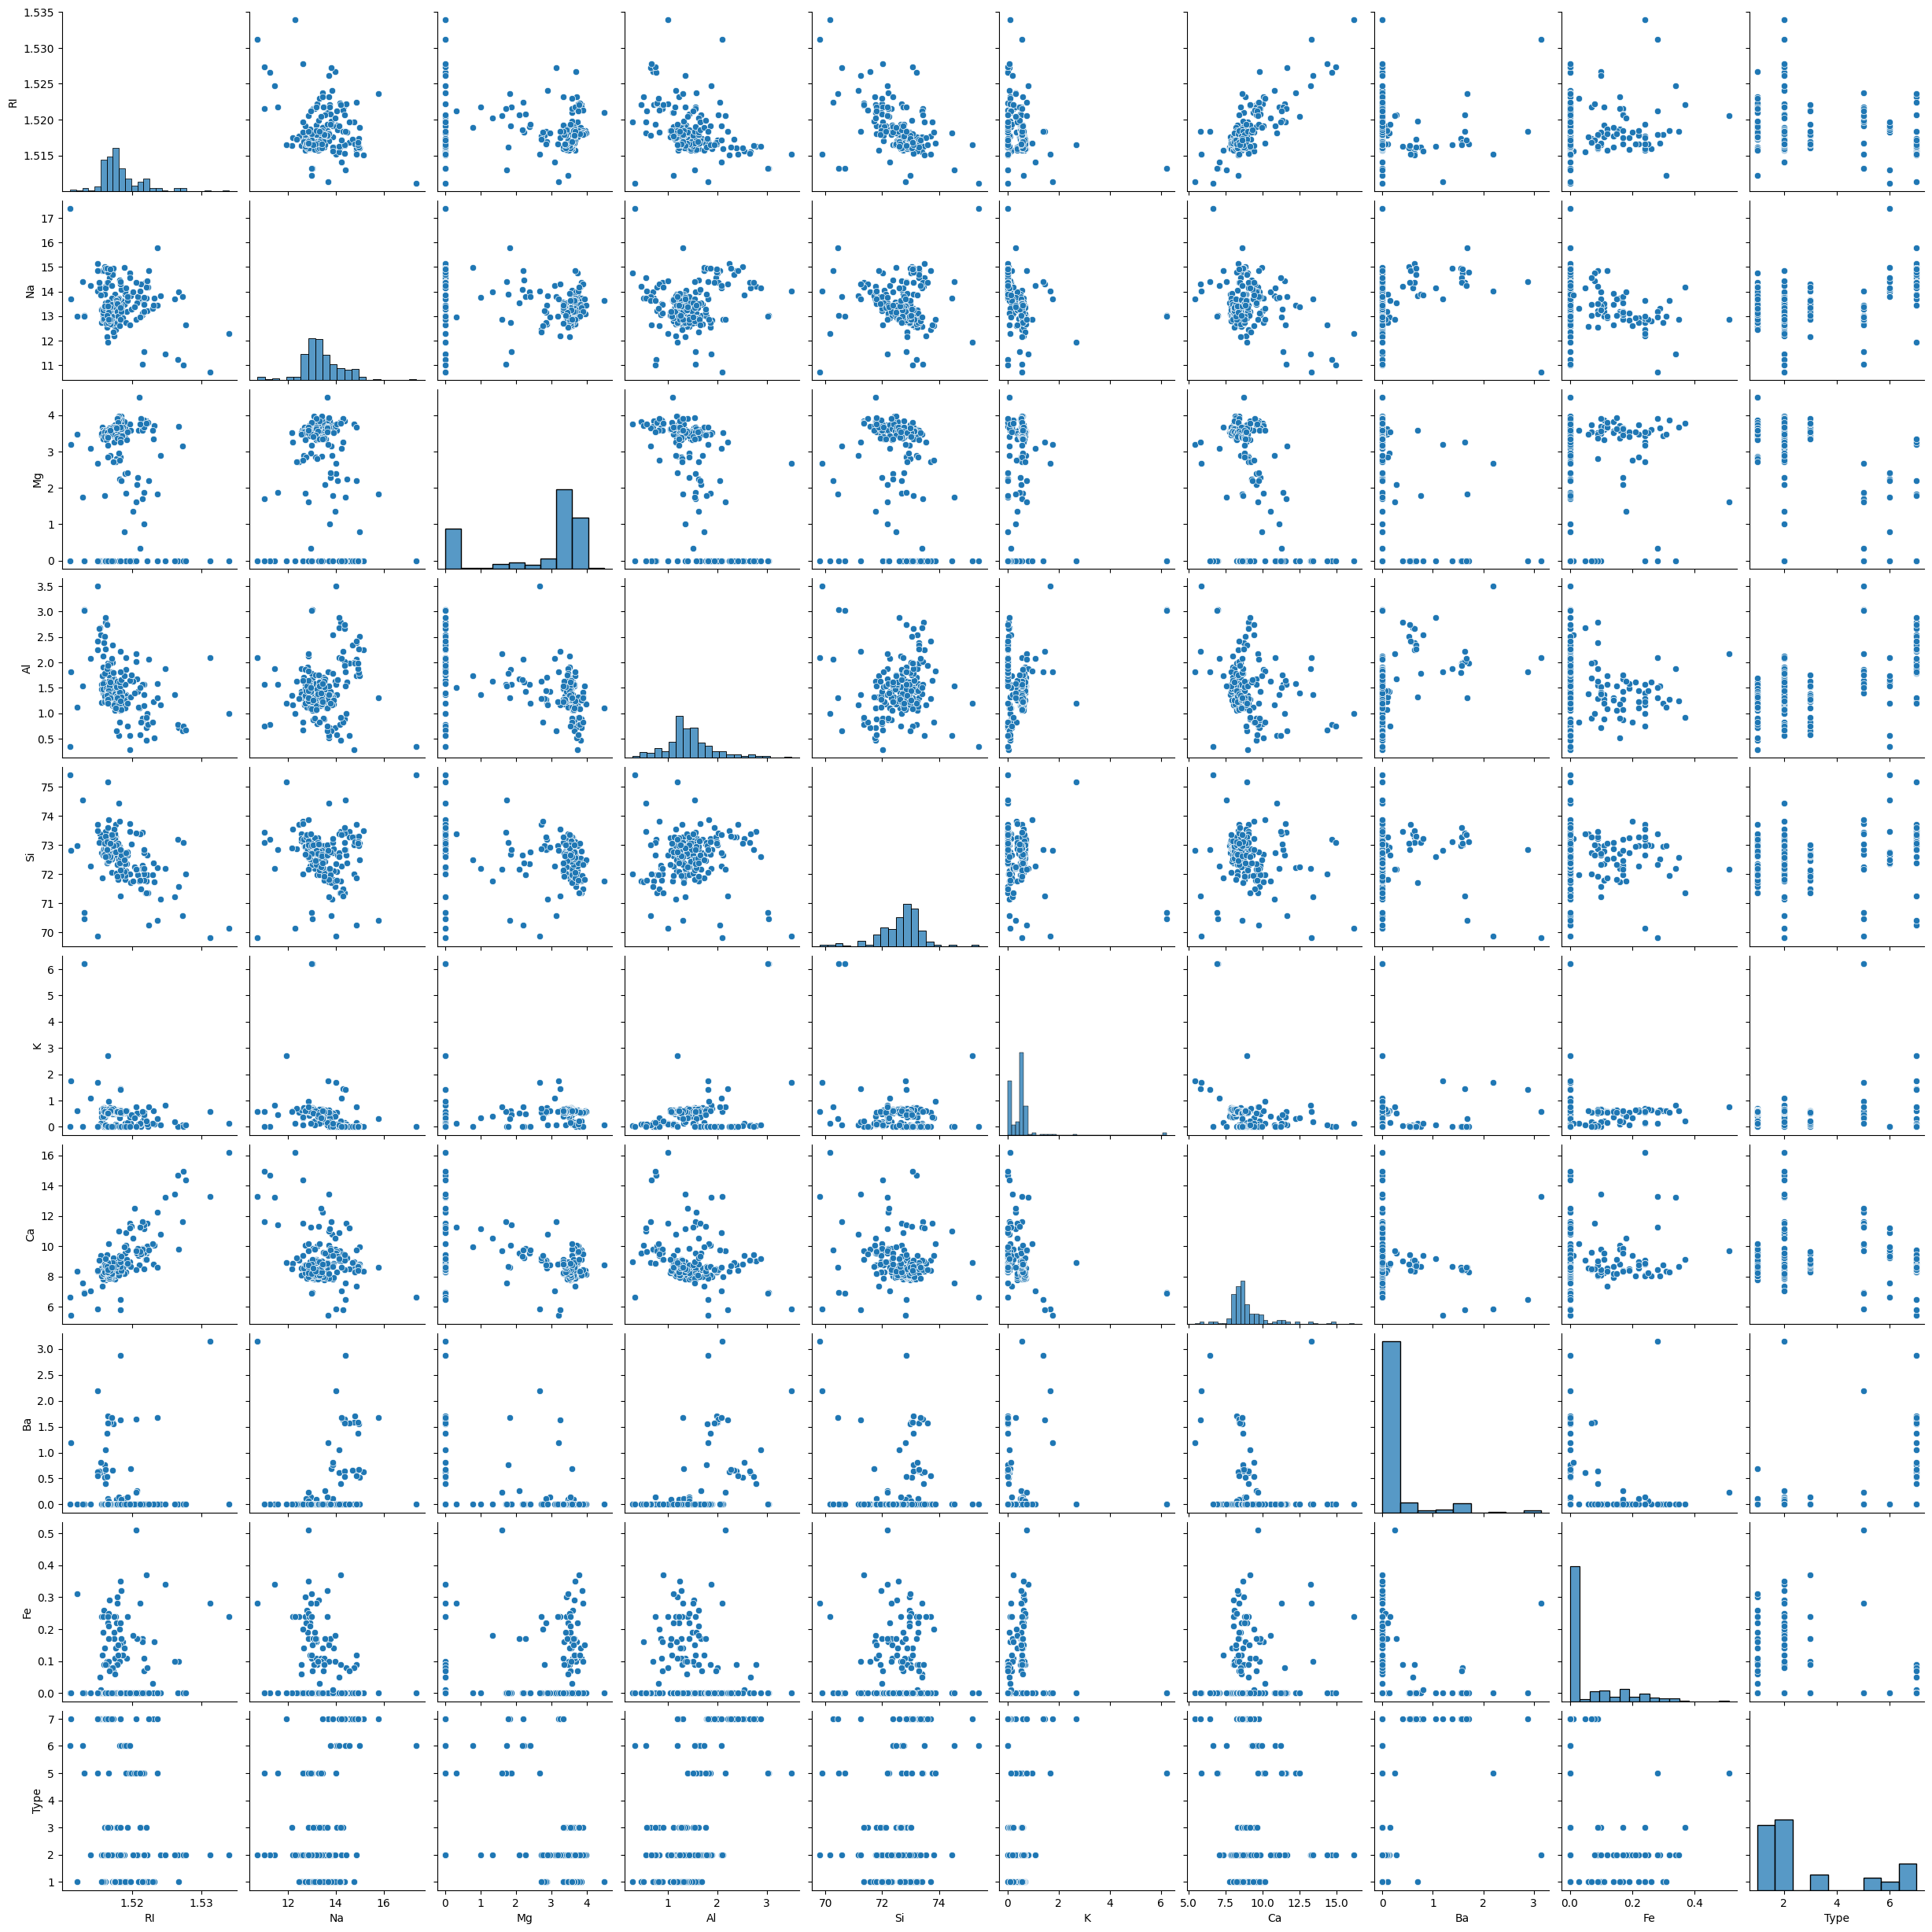

In [22]:
sns.pairplot(df)

<Axes: >

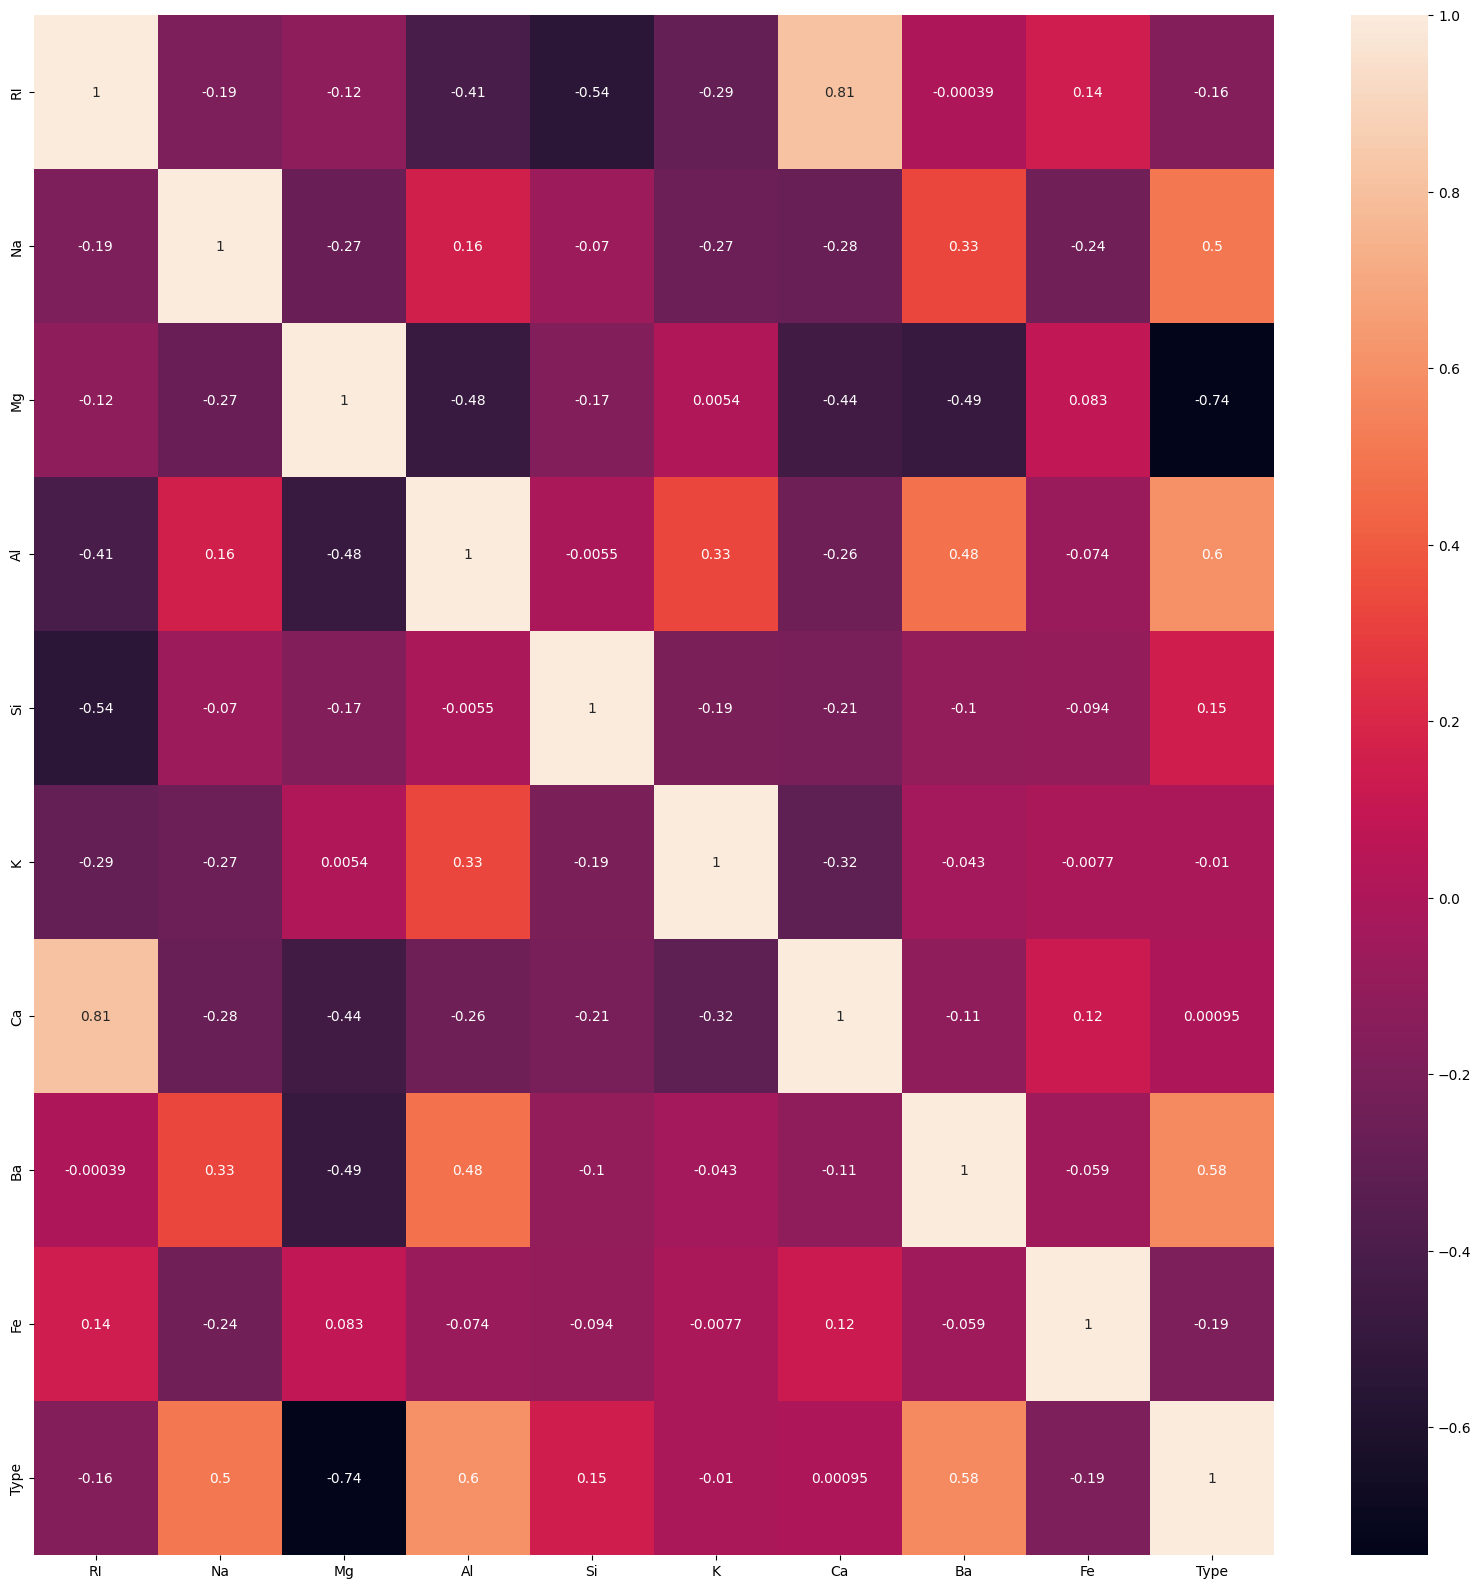

In [23]:
corr=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)

## 3: Data Preprocessing

1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.

2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.

3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

In [24]:
df.isna().sum()

RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64

In [25]:
df=df.dropna()

In [26]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [27]:
df

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0   1.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0   1.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0   1.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0   1.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0   1.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0   7.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0   7.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0   7.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0   7.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0   7.0

[214 rows x 10 columns]

There is no categorical columns in this dataset so we can't do any encoding techniques

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [29]:
df_scaled

RI        Na        Mg  ...        Ba        Fe      Type
0    0.872868  0.284953  1.254639  ... -0.352877 -0.586451 -0.848275
1   -0.249333  0.591817  0.636168  ... -0.352877 -0.586451 -0.848275
2   -0.721318  0.149933  0.601422  ... -0.352877 -0.586451 -0.848275
3   -0.232831 -0.242853  0.698710  ... -0.352877 -0.586451 -0.848275
4   -0.312045 -0.169205  0.650066  ... -0.352877 -0.586451 -0.848275
..        ...       ...       ...  ...       ...       ...       ...
209 -0.704815  0.898681 -1.865511  ...  1.783978 -0.586451  2.010478
210 -0.500178  1.856097 -1.865511  ...  2.852405 -0.586451  2.010478
211  0.754046  1.168721 -1.865511  ...  2.953200 -0.586451  2.010478
212 -0.612399  1.193270 -1.865511  ...  2.812087 -0.586451  2.010478
213 -0.414363  1.009152 -1.865511  ...  3.013677 -0.586451  2.010478

[214 rows x 10 columns]

In [30]:
df.value_counts()

RI       Na     Mg    Al    Si     K     Ca     Ba    Fe    Type
1.52213  14.21  3.82  0.47  71.77  0.11  9.57   0.00  0.00  1.0     2
1.51131  13.69  3.20  1.81  72.81  1.76  5.43   1.19  0.00  7.0     1
1.51215  12.99  3.47  1.12  72.98  0.62  8.35   0.00  0.31  1.0     1
1.51299  14.40  1.74  1.54  74.55  0.00  7.59   0.00  0.00  6.0     1
1.51115  17.38  0.00  0.34  75.41  0.00  6.65   0.00  0.00  6.0     1
                                                                   ..
1.52725  13.80  3.15  0.66  70.57  0.08  11.64  0.00  0.00  2.0     1
1.52739  11.02  0.00  0.75  73.08  0.00  14.96  0.00  0.00  2.0     1
1.52777  12.64  0.00  0.67  72.02  0.06  14.40  0.00  0.00  2.0     1
1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28  2.0     1
1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.00  0.24  2.0     1
Name: count, Length: 213, dtype: int64

There is imbalance in Type data, we have to handle that imbalanced data

In [31]:
df['Type'].value_counts(normalize=True)*100

Type
2.0    35.514019
1.0    32.710280
7.0    13.551402
3.0     7.943925
5.0     6.074766
6.0     4.205607
Name: proportion, dtype: float64

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

x=df.drop(['Type'],axis=1)
y=df['Type']

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

model=SVC(class_weight='balanced')
model.fit(x_train,y_train)

y_pred=model.predict(x_test)


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=0))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        11
         2.0       0.00      0.00      0.00        14
         3.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         4
         6.0       0.06      0.67      0.10         3
         7.0       0.67      0.50      0.57         8

    accuracy                           0.14        43
   macro avg       0.12      0.19      0.11        43
weighted avg       0.13      0.14      0.11        43



In [34]:
import numpy as np

missing_classes = set(np.unique(y_test)) - set(np.unique(y_pred))
print("Classes not predicted by the model:", missing_classes)


Classes not predicted by the model: {np.float64(1.0), np.float64(2.0), np.float64(3.0)}


## 4: Random Forest Model Implementation

1. Divide the data into train and test split.

2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.

3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
model1=RandomForestClassifier(n_estimators=100,random_state=42)
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)

In [39]:
print(f'Accuracy Score {(accuracy_score(y_test,y_pred1)):.2f}')
print(f"Precision Score{precision_score(y_test,y_pred1,average='weighted'):.2f}")
print(f"Recall Score {recall_score(y_test,y_pred1,average='weighted'):.2f}")
print(f"F1 Score {f1_score(y_test,y_pred1,average='weighted'):.2f}")

Accuracy Score 0.84
Precision Score0.87
Recall Score 0.84
F1 Score 0.83


## 5: Bagging and Boosting Methods

Apply the Bagging and Boosting methods and compare the results.


In [40]:
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [45]:
bag_model=BaggingClassifier(estimator=DecisionTreeClassifier(),random_state=42,n_estimators=100)
bag_model.fit(x_train,y_train)
y_pred2=bag_model.predict(x_test)

In [46]:
print(f'Accuracy Score {(accuracy_score(y_test,y_pred2)):.2f}')
print(f"Precision Score{precision_score(y_test,y_pred2,average='weighted'):.2f}")
print(f"Recall Score {recall_score(y_test,y_pred2,average='weighted'):.2f}")
print(f"F1 Score {f1_score(y_test,y_pred2,average='weighted'):.2f}")

Accuracy Score 0.86
Precision Score0.86
Recall Score 0.86
F1 Score 0.85


In [47]:
boost_model=AdaBoostClassifier(estimator=DecisionTreeClassifier(),random_state=42,n_estimators=100)
boost_model.fit(x_train,y_train)
y_pred3=boost_model.predict(x_test)

In [48]:
print(f'Accuracy Score {(accuracy_score(y_test,y_pred3)):.2f}')
print(f"Precision Score{precision_score(y_test,y_pred3,average='weighted'):.2f}")
print(f"Recall Score {recall_score(y_test,y_pred3,average='weighted'):.2f}")
print(f"F1 Score {f1_score(y_test,y_pred3,average='weighted'):.2f}")

Accuracy Score 0.77
Precision Score0.80
Recall Score 0.77
F1 Score 0.76


## Additional Notes:

### 1. Explain Bagging and Boosting methods. How is it different from each other.

#### Bagging 

It builds multiple models in parallel using random subsets of data and combines them to reduce variance. (Example: Random Forest)

#### Boosting 

It builds models sequentially, where each model corrects previous errors to reduce bias and improve accuracy. (Examples: AdaBoost, Gradient Boosting)

#### Difference Between Bagging and Boosting

Bagging trains multiple models independently in parallel, while Boosting trains models sequentially, with each new model correcting the errors of the previous one.

Bagging mainly reduces variance, whereas Boosting reduces both bias and variance by focusing more on misclassified samples.

### 2. Explain how to handle imbalance in the data.

Balance the dataset using resampling methods — oversampling the minority class or undersampling the majority class.

Use class weights or better metrics like Precision, Recall, F1-score, or ROC-AUC instead of accuracy to handle imbalance effectively.